In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import open3d as o3d
from matplotlib import pyplot as plt
from open3d.web_visualizer import draw
from mpl_toolkits.mplot3d import Axes3D
current_palette = sns.color_palette('bright',10)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [3]:
# cube_red = o3d.geometry.TriangleMesh.create_box(1, 2, 4)
# cube_red.compute_vertex_normals()
# cube_red.paint_uniform_color((1.0, 0.0, 0.0))
# draw(cube_red)

In [66]:
input_file = "input.ply"
pcd = o3d.io.read_point_cloud("./data/contactpose_data/full28_use/bowl/bowl.ply") # Read the point cloud

In [98]:
object_points = np.asarray(pcd.points) 
object_sample_id = np.random.choice(object_points.shape[0], 2048, replace=False)
object_points = object_points[object_sample_id]

In [99]:
left_hand_joint = cp.hand_joints()[0]
right_hand_joint = cp.hand_joints()[1]

In [100]:
len(object_points)

2048

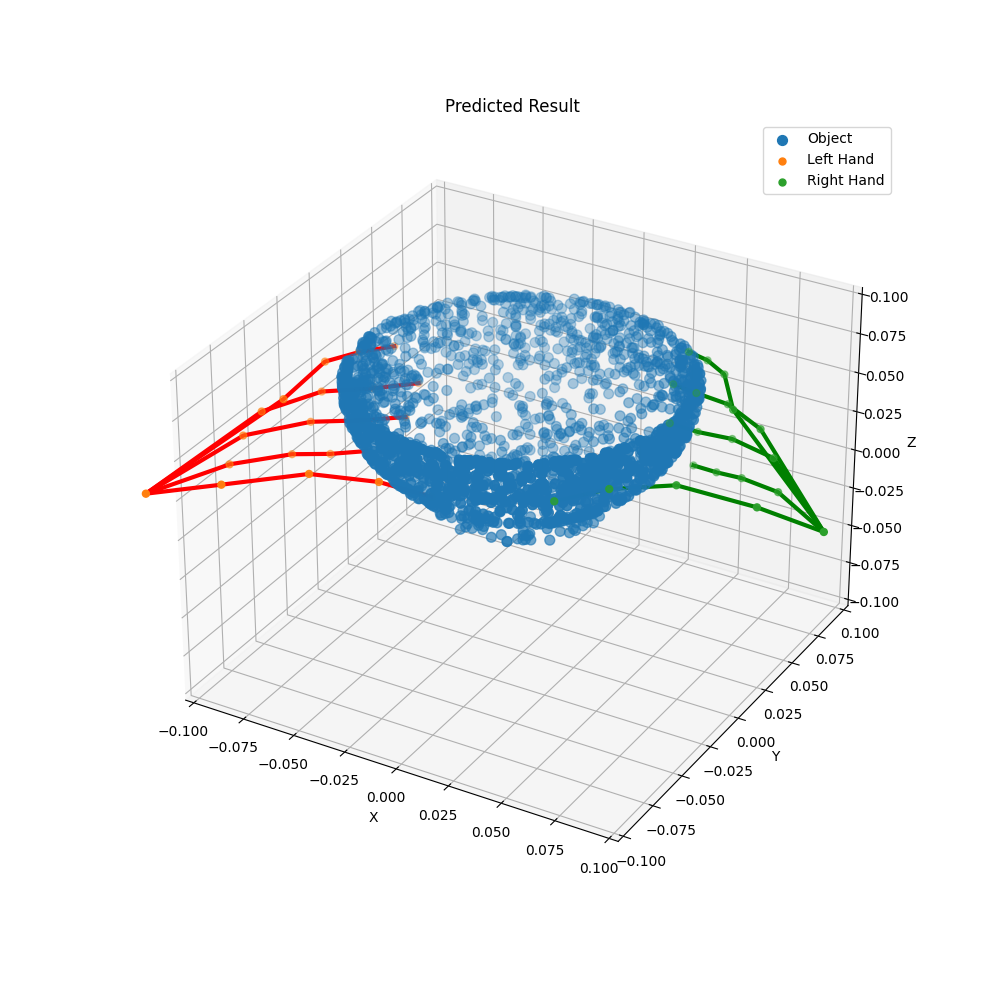

In [101]:
%matplotlib widget

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.1,0.1)
ax.set_ylim(-0.1,0.1)
ax.set_zlim(-0.1,0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(object_points[:,0], object_points[:,1], object_points[:,2],marker='.', s=200, label='Object')
ax.scatter(left_hand_joint[:,0], left_hand_joint[:,1], left_hand_joint[:,2],marker='.', s=100, label='Left Hand')
ax.scatter(right_hand_joint[:,0], right_hand_joint[:,1], right_hand_joint[:,2],marker='.', s=100, label='Right Hand')

ax.plot(left_hand_joint[:5][:,0], left_hand_joint[:5][:,1], left_hand_joint[:5][:,2], linewidth=3, color='r')
ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,2], linewidth=3, color='r')
ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,2], linewidth=3, color='r')
ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,0],np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,2], linewidth=3, color='r')
ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,1] , np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,2], linewidth=3, color='r')


ax.plot(right_hand_joint[:5][:,0], right_hand_joint[:5][:,1], right_hand_joint[:5][:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,0],np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,1] , np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,2], linewidth=3, color='g')

    
ax.set_title('Predicted Result')
ax.legend()
plt.show()

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from utilities.dataset import ContactPose
import utilities.misc as mutils

In [78]:
cp = ContactPose(28, 'use', 'bowl')
print(cp.hand_joints())

MANO code was not detected, please follow steps in README.md. mano_meshes() will return (None, None)
(array([[-0.09103539, -0.1429454 ,  0.06081487],
       [-0.06784853, -0.123522  ,  0.06232945],
       [-0.04323405, -0.09704102,  0.06084233],
       [-0.02030137, -0.08091315,  0.05395088],
       [ 0.00142398, -0.07617097,  0.04994612],
       [-0.07720061, -0.06287964,  0.07254209],
       [-0.08047606, -0.02590339,  0.07182242],
       [-0.07756052, -0.00407024,  0.06540209],
       [-0.07193688,  0.01522766,  0.05934276],
       [-0.08914707, -0.06151341,  0.05957198],
       [-0.08330508, -0.02474036,  0.051073  ],
       [-0.07256268, -0.00119515,  0.04217282],
       [-0.06309627,  0.02009729,  0.03568053],
       [-0.09507959, -0.06697339,  0.04570889],
       [-0.08349108, -0.03348737,  0.03723868],
       [-0.07082185, -0.01274151,  0.02959193],
       [-0.05981062,  0.00386143,  0.02519355],
       [-0.09746635, -0.07430466,  0.03132193],
       [-0.08424728, -0.04730602, 

In [46]:
# 3D hand joints (21 per hand) w.r.t. object
for hand_name, j in zip(('Left', 'Right'), cp.hand_joints()):
    print('##### Hand: {:s}'.format(hand_name))
    if j is not None:
        print(j.shape)
        hand_joint = j
    else:
        print('Absent')

##### Hand: Left
(21, 3)
##### Hand: Right
(21, 3)


In [47]:
cp.object_pose

<bound method ContactPose.object_pose of Participant 28, intent use, object bowl
558 frames
Cameras present: kinect2_left kinect2_middle kinect2_right
Hands present: left right>

In [72]:
cp.object_joints()

AttributeError: 'ContactPose' object has no attribute 'object_joints'